In [23]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer  # Pastikan modul SimpleImputer diimpor
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [45]:
# Membaca dataset diabetes.csv
df = pd.read_csv('diabetes.csv')

# 1. Imputasi missing value
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')

df['Glucose'] = mean_imputer.fit_transform(df[['Glucose']])
df['BloodPressure'] = median_imputer.fit_transform(df[['BloodPressure']])
df['SkinThickness'] = mode_imputer.fit_transform(df[['SkinThickness']])



In [47]:
(df.isnull().sum()/len(df))*100

Pregnancies                 10.026042
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness                0.000000
Insulin                     61.067708
BMI                         30.859375
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

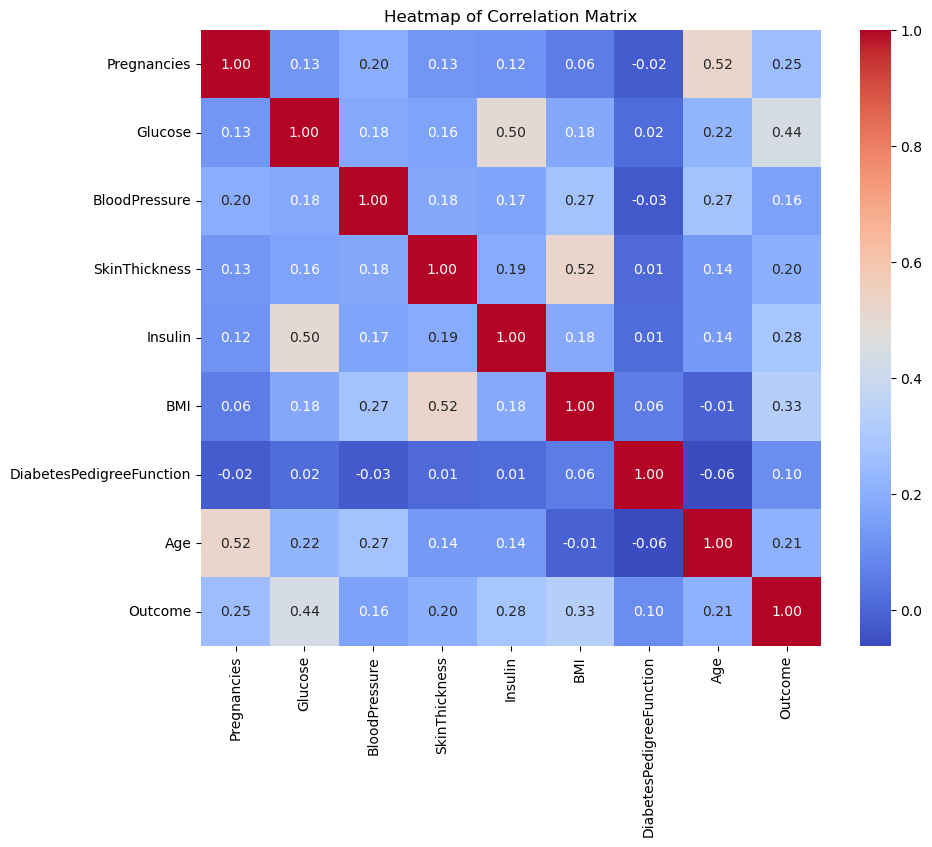

In [37]:
# 2. Korelasi antar variabel dengan heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

X = df.drop('Outcome', axis=1)
y = df['Outcome']
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Outcome'])], axis=1)

In [39]:
# Memisahkan fitur dan label (misal 'Outcome' sebagai label)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Menerapkan undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Menggabungkan kembali data yang sudah di-undersample
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Outcome'])], axis=1)

In [41]:
robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(X_resampled), columns=X.columns)

minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(X_resampled), columns=X.columns)

# Menampilkan hasil scaling
print("Data setelah Robust Scaler:\n", df_robust_scaled.head())
print("Data setelah MinMax Scaler:\n", df_minmax_scaled.head())

Data setelah Robust Scaler:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0         -0.4 -0.750540           -0.2            1.6       NaN       NaN   
1          0.4  0.000000           -2.4            0.0       NaN  0.113924   
2          0.0 -0.316432           -1.4           -0.2 -0.796296 -0.417722   
3         -0.2  0.241708            1.2            0.0       NaN -0.607595   
4          0.8 -0.595502            0.2            1.6       NaN  0.556962   

   DiabetesPedigreeFunction     Age  
0                 -0.203012 -0.0625  
1                  0.939096 -0.3750  
2                 -0.772940 -0.5625  
3                 -0.030124 -0.2500  
4                 -0.239686     NaN  
Data setelah MinMax Scaler:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.058824  0.281690       0.511111       0.358696       NaN       NaN   
1     0.294118  0.452147       0.266667       0.271739       NaN  0.316973   
2     0.176